In [11]:
import polars as ps

In [12]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
df_cards = ps.read_csv('../Data/cards_data.csv')

In [16]:
df_cards.head()

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,i64,str,str,i64,str,i64,str,i64,str,str,i64,str
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,"""$24295""","""09/2002""",2008,"""No"""
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,"""$21968""","""04/2014""",2014,"""No"""
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,"""$46414""","""07/2003""",2004,"""No"""
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,"""$12400""","""01/2003""",2012,"""No"""
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,"""$28""","""09/2008""",2009,"""No"""


In [61]:
#convert the 'credit_limit' column to numeric by removing dollar sign and commas
df_cards = df_cards.with_columns(
    ps.col('credit_limit')
    .cast(ps.String)
    .str.replace(r'[\$,]','',literal=False) # Remove dollar sign and commas
    .cast(ps.Float64) #convert the cleaned string to a float
)

In [20]:
df_cards = df_cards.with_columns(
    ps.col("acct_open_date")
    .cast(ps.String)
    .str.strptime(ps.Date, format="%m/%Y")
    .alias("acct_open_date")
)

In [62]:
df_cards.head()


id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,expiry_year
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64,i64
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,24295.0,2002-09-01,2008,2022
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,21968.0,2014-04-01,2014,2020
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,46414.0,2003-07-01,2004,2024
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,12400.0,2003-01-01,2012,2024
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,28.0,2008-09-01,2009,2009


In [21]:
#Select string columns
string_Columns = df_cards.select(ps.selectors.string()).columns

#Iterate over string columns and print the number of unique value
for col in string_Columns:
    unique_count=df_cards[col].n_unique()
    print(f"{col}:{unique_count} unique value")

card_brand:4 unique value
card_type:3 unique value
expires:259 unique value
has_chip:2 unique value
card_on_dark_web:1 unique value


# Here surprisingly we have only one value for card_on_dark_web


In [22]:
df_cards.filter(ps.col('card_on_dark_web') == 'Yes')


id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64,str


since no records found we delete this column

In [23]:
df_cards.drop_in_place('card_on_dark_web')

card_on_dark_web
str
"""No"""
"""No"""
"""No"""
"""No"""
"""No"""
…
"""No"""
"""No"""
"""No"""


In [24]:
df_cards.head()

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,24295.0,2002-09-01,2008
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,21968.0,2014-04-01,2014
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,46414.0,2003-07-01,2004
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,12400.0,2003-01-01,2012
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,28.0,2008-09-01,2009


# Graphical Analysis

### 1. Histogram of card Brands
  * Numbers of users for each card brand (Visa,Mastercard,etc.)
  * Subdivide the histogram by **card_type** (Credit,Debit,Prepaid)
   

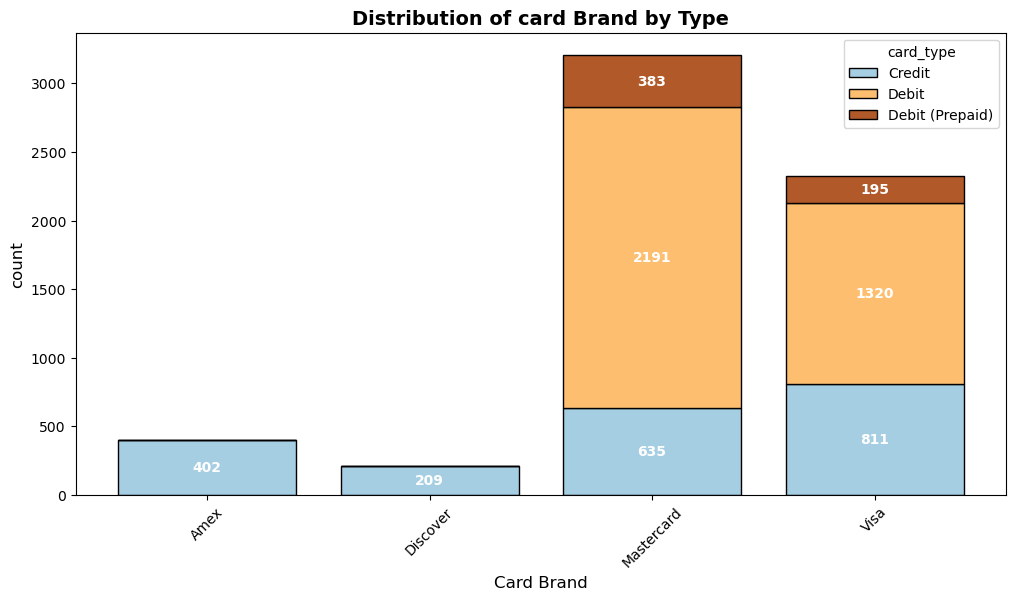

In [25]:
# count occurances of each card brand and card type correctly 
card_counts = (
    df_cards
    .group_by(["card_brand", "card_type"])
    .agg(ps.len().alias("count"))
)

# convert to lists for consistent ordering 
brand_labels= sorted(card_counts["card_brand"].unique().to_list())
type_labels= sorted(card_counts["card_type"].unique().to_list())

# create dictionary to store counts for each (brand, type) pair
brand_type_counts= {brand:{card_type: 0 for card_type in type_labels} for brand in brand_labels}

for row in card_counts.iter_rows(named=True):
    brand_type_counts[row["card_brand"]][row["card_type"]] = row["count"]


#convert to a NumPy array for stacked plotting
data_matrix = np.array([[brand_type_counts[brand].get(card_type, 0) for card_type in type_labels] for brand in brand_labels])

#define colors for different card type
colors = plt.cm.Paired(np.linspace(0, 1, len(type_labels)))

#plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(brand_labels))

bars = []
for i, card_type in enumerate(type_labels):
    bars.append(ax.bar(brand_labels, data_matrix[:, i], bottom=bottom, color=colors[i], edgecolor="black", label=card_type))
    bottom += data_matrix[:, i] # stack the bars

#Add  labels and title
ax.set_xlabel("Card Brand", fontsize = 12)
ax.set_ylabel("count",fontsize = 12)
ax.set_title("Distribution of card Brand by Type", fontsize=14, fontweight="bold")
ax.legend(title="card_type", loc="upper right")

#Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Anonate each stacked bar segment 
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height/2, int(height),
                    ha="center", va="center", fontsize=10, fontweight="bold", color="white" )

#show the plot
plt.show()




### 2. Bar Chart of Card Types
* Numbers of users by card type(Credit, Debit, Prepaid)

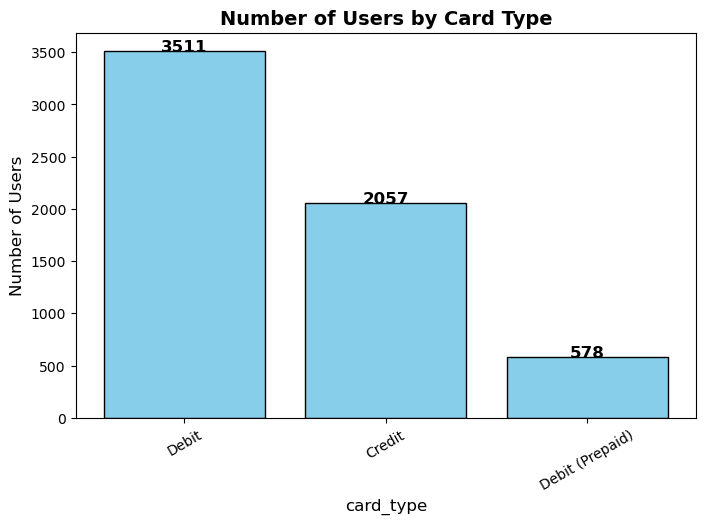

In [26]:
#Count occurences of each card type
card_type_counts = (
    df_cards
    .group_by("card_type")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

#Extract labels and values for plotting
card_types= card_type_counts["card_type"].to_list()
counts = card_type_counts["count"].to_list()

#Plot the bar chart 
plt.figure(figsize=(8, 5))
plt.bar(card_types, counts, color="skyblue", edgecolor="black" )

#Add labels and title
plt.xlabel("card_type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Number of Users by Card Type", fontsize=14, fontweight="bold")

# Annonate bars with counts
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.xticks(rotation=30)
plt.show()


### 3. Pie Chart of Card Brand Distribution
* Proportion of different card brands in the dataset.

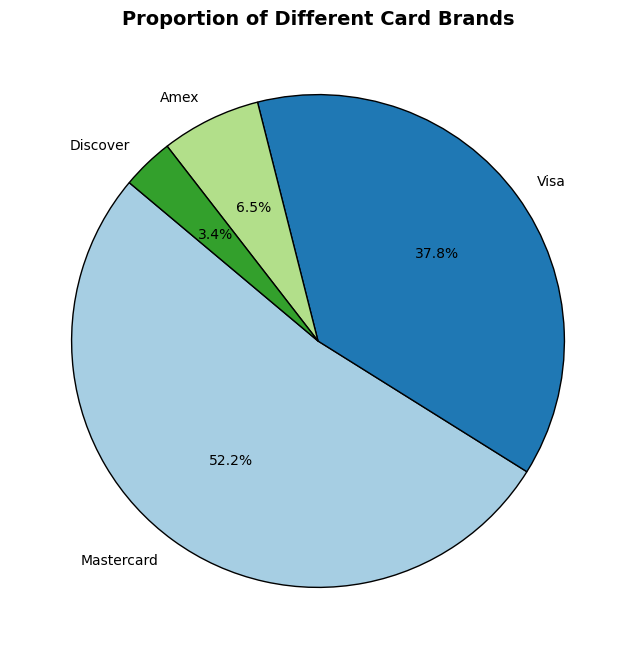

In [27]:
# Count Occurance of each card brand
card_brand_counts = (
    df_cards
    .group_by("card_brand")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

#Extract labels and values for plotting
brands = card_brand_counts["card_brand"].to_list()
counts = card_brand_counts["count"].to_list()

#Define colors for the better visualization
colors = plt.cm.Paired.colors[:len(brands)]

#Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=brands, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

#Add title 
plt.title("Proportion of Different Card Brands", fontsize=14, fontweight="bold")

#Show the Plot
plt.show()

### 4. Pie Chart of Card Type Distibution
* Proportion of diffrent card types(Credit,Debit, Prepaid)

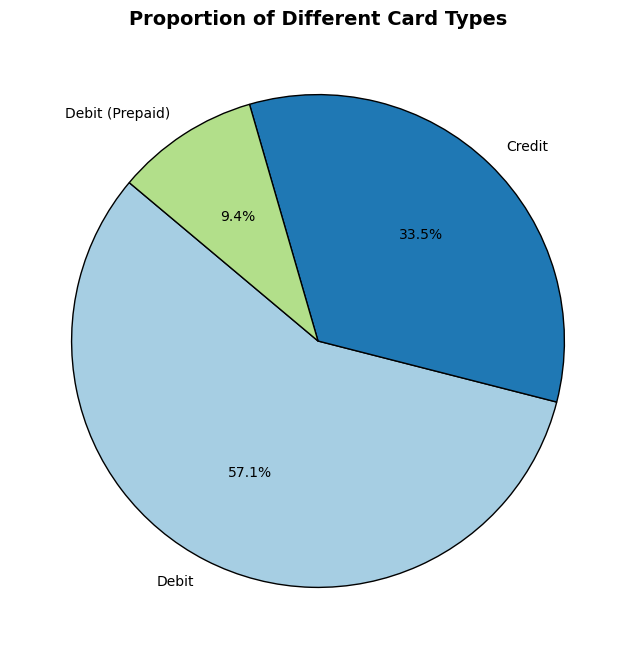

In [28]:
# Count Occurance of each card type
card_type_counts = (
    df_cards
    .group_by("card_type")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

#Extract labels and values for plotting
card_types = card_type_counts["card_type"].to_list()
counts = card_type_counts["count"].to_list()

#Define colors for the better visualization
colors = plt.cm.Paired.colors[:len(card_types)]

#Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=card_types, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

#Add title 
plt.title("Proportion of Different Card Types", fontsize=14, fontweight="bold")

#Show the Plot
plt.show()

### 5. Histogram of Credit limits
* Distribtion of **Credit_limit** to see how limits vary across users

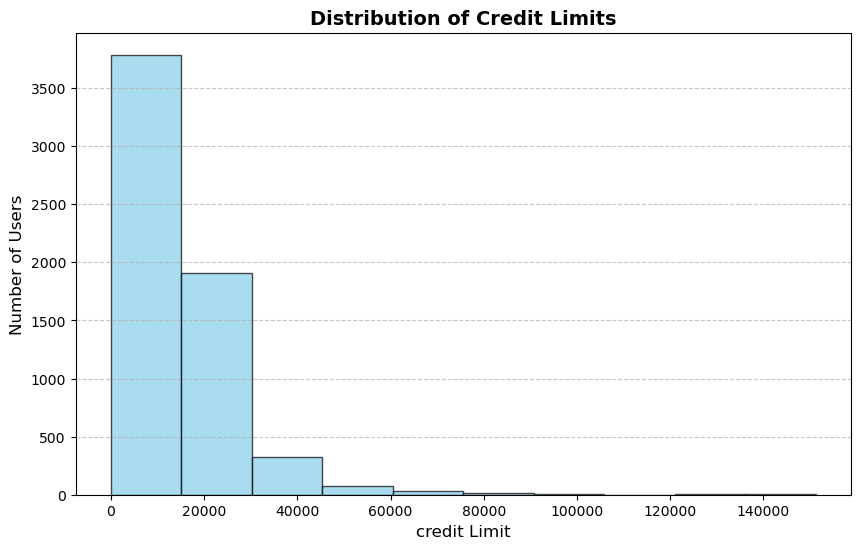

In [29]:
# Extract credit limit values
credit_limits = df_cards["credit_limit"].to_list()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(credit_limits, bins=10, color="skyblue", edgecolor="black", alpha=0.7)

# Add labels and title 
plt.xlabel("credit Limit", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Distribution of Credit Limits", fontsize=14, fontweight="bold")

#show the plot 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 6.Box Plot of Credit Limits per Card Type
* Compare credit limits between credit,debit, and prepaid cards.

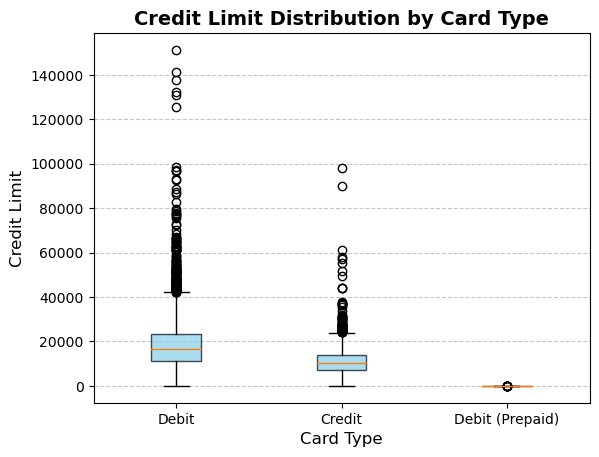

In [33]:
#Group data by card type
card_type=df_cards["card_type"].unique().to_list()
credit_limit_data = [df_cards.filter(df_cards["card_type"] == ct)["credit_limit"].to_list() for ct in card_type]

#Plot the box plot 
plt.Figure(figsize=(8,6))
plt.boxplot(credit_limit_data, labels=card_types, patch_artist=True, boxprops=dict(facecolor="skyblue",alpha=0.7))

#Add labels and title
plt.xlabel("Card Type", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.title("Credit Limit Distribution by Card Type", fontsize=14, fontweight="bold")

#show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 7. Box Plot of Credit Limits per Card Brand
* Compare the **credit limit** distribution for Visa,Mastercard etc.

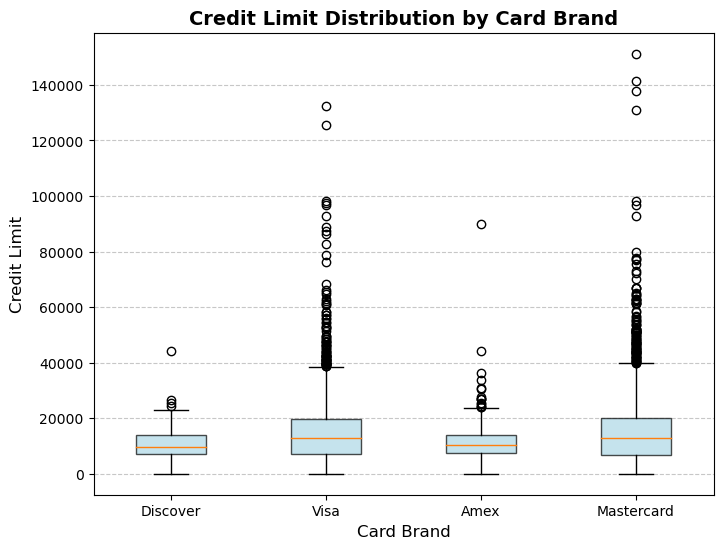

In [34]:
# Group data by card brand
card_brands = df_cards["card_brand"].unique().to_list()
credit_limit_data = [df_cards.filter(df_cards["card_brand"] == brand)["credit_limit"].to_list() for brand in card_brands]

# Plot the box plot
plt.figure(figsize=(8,6))
plt.boxplot(credit_limit_data, labels=card_brands, patch_artist=True, boxprops=dict(facecolor="lightblue", alpha=0.7))

# Add labels and title
plt.xlabel("Card Brand", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.title("Credit Limit Distribution by Card Brand", fontsize=14, fontweight="bold")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 8. Histogram of number of cards Issued
* Shows how many users have **one or multiple cads**

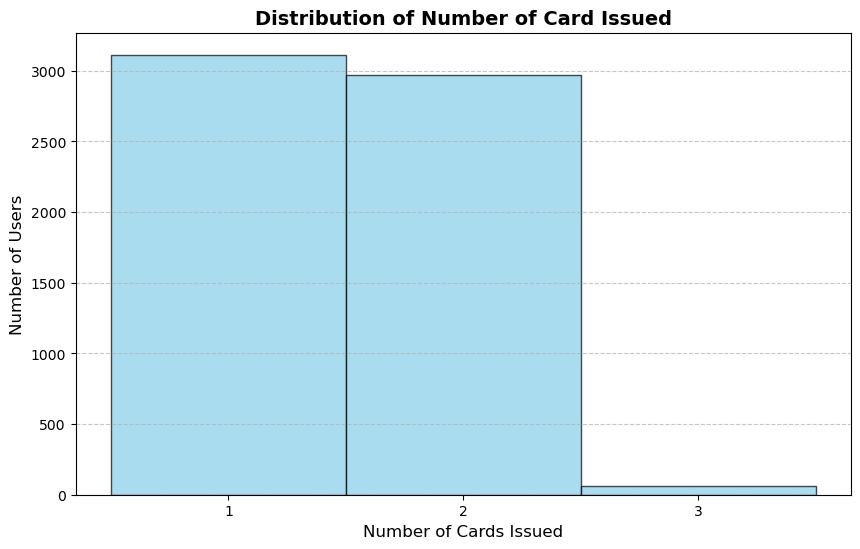

In [63]:
 # Extract numbers of cards issued
num_cards = df_cards["num_cards_issued"].to_list()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(num_cards, bins=range(1, max(num_cards) + 2), color="skyblue", edgecolor="black", alpha=0.7, align='left')

# Add labels and title 
plt.xlabel("Number of Cards Issued", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Distribution of Number of Card Issued", fontsize=14, fontweight="bold")

#show the plot
plt.xticks(range(1, max(num_cards) + 1)) #Ensure ticks are at whole numbers
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 9.  Time Series Analysis of Acount Opening Dates
* Line chart showing the trend of Acount opening over time

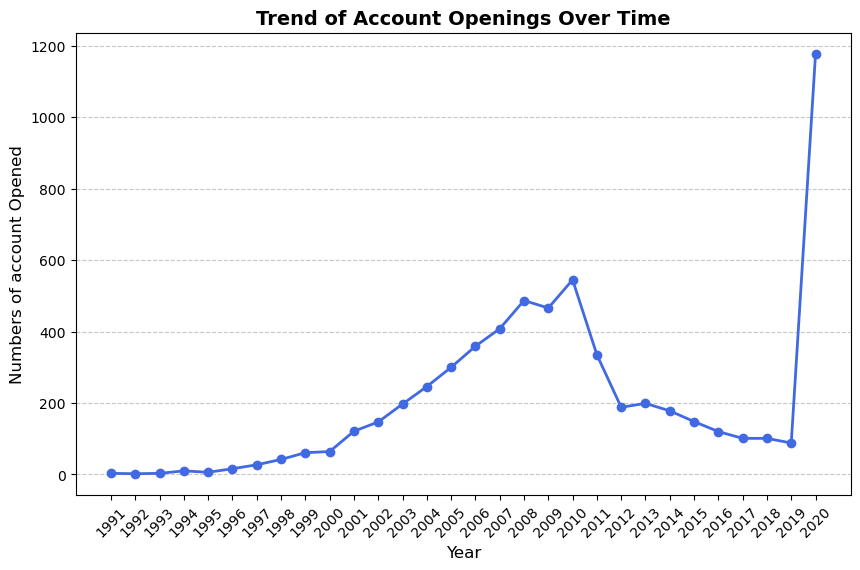

In [64]:
yearly_counts = df_cards.group_by(
    df_cards["acct_open_date"].dt.year().alias("year")
).agg(
    ps.len().alias("num_accounts")
).sort("year")
# Extract data for plotting
years = yearly_counts["year"].to_list()
num_accounts = yearly_counts["num_accounts"].to_list()

# Plot the time series line chart
plt.figure(figsize=(10,6))
plt.plot(years, num_accounts, marker="o", linestyle="-", color="royalblue", linewidth=2)

# Add labels and title 
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of account Opened", fontsize=12)
plt.title("Trend of Account Openings Over Time", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(years, rotation=45)  # ensure all years  are labeled
plt.show()

### 10. Time Series Analysis of PIN Changes
* Line chart showing the **trend of year_wise PIN changes

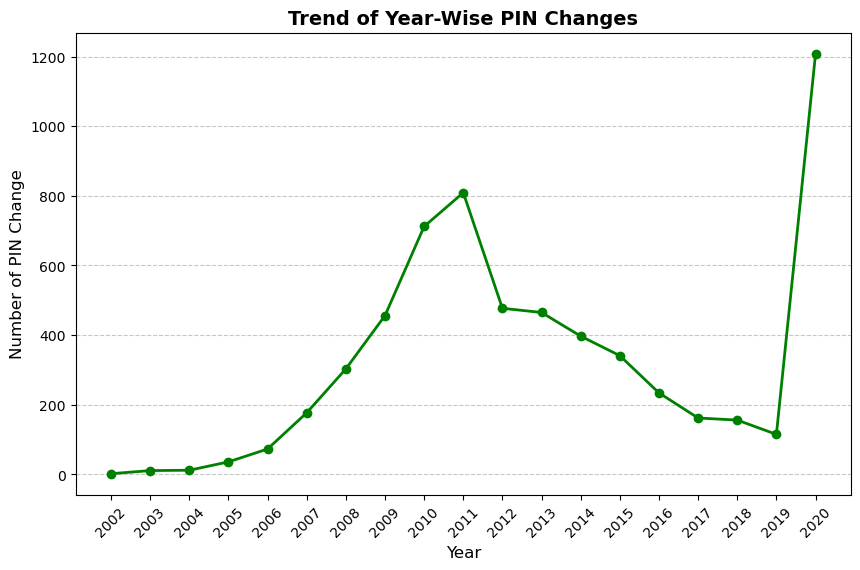

In [39]:
# Count the number of PIN Changes per year 
yearly_pin_changes = df_cards.group_by("year_pin_last_changed").agg(ps.len().alias("num_changes")).sort("year_pin_last_changed")

# Extract data for plotting
years = yearly_pin_changes["year_pin_last_changed"].to_list()
num_changes = yearly_pin_changes["num_changes"].to_list()

# Plot the time series line chart
plt.figure(figsize=(10,6))
plt.plot(years, num_changes, marker="o", linestyle="-", color="green", linewidth=2)

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of PIN Change", fontsize=12)
plt.title("Trend of Year-Wise PIN Changes", fontsize=14, fontweight="bold")

# show the grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(years, rotation=45) # Ensure all years are labeled
plt.show()

### 11. Bar Chart for card Issued per Year
* Number of **card issued** each year

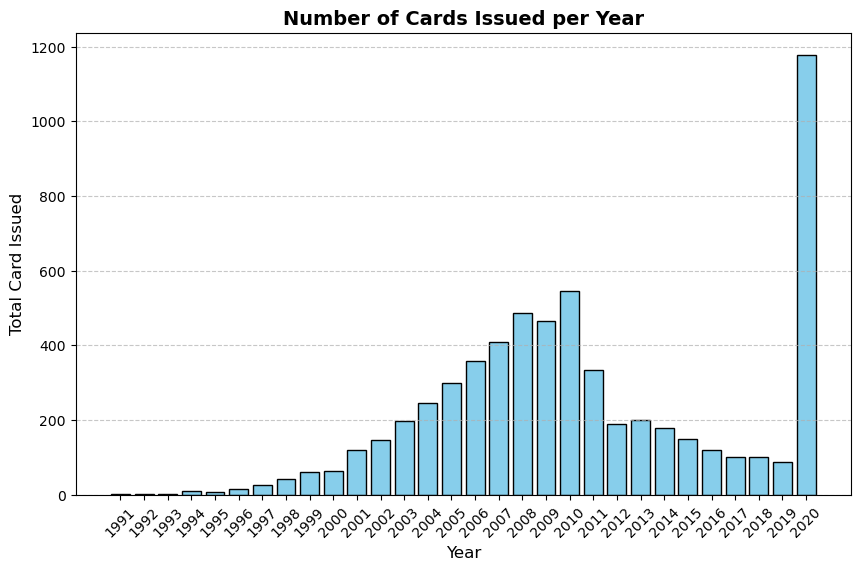

In [65]:
cards_issued_per_year = df_cards.group_by(
    ps.col("acct_open_date").dt.year().alias("year")
).agg(
    ps.len().alias("total_cards")
).sort("year")

#Extract data for plotting
years=cards_issued_per_year["year"].to_list()
total_cards = cards_issued_per_year["total_cards"].to_list()

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(years, total_cards, color="skyblue", edgecolor="black")

# Add labels and title 
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Card Issued", fontsize=12)
plt.title("Number of Cards Issued per Year", fontsize=14, fontweight="bold")

# show grid and label 
plt.xticks(years, rotation=45) # Ensure all years are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 12. Scatter PLot of Account Opening Date vs. Credit Limit
* See if older accounts have **higher credit limits**

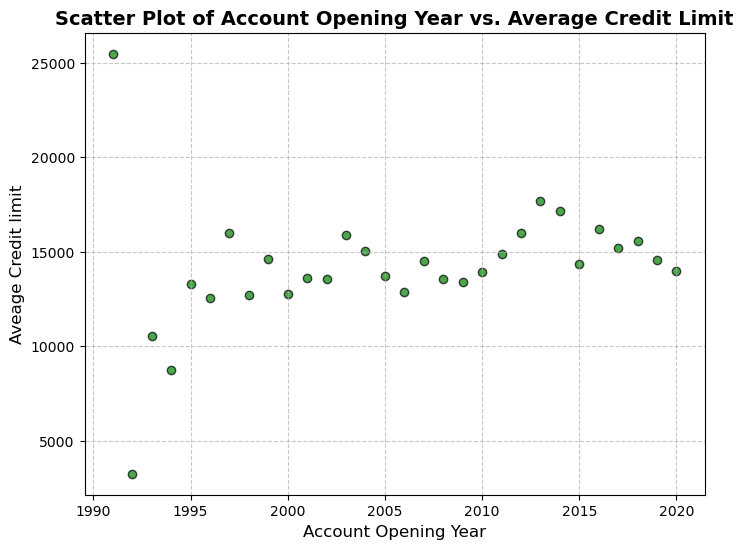

In [50]:
# Group data by the year extracted from 'acct_open_date' and aggregate credit limits
credit_limits_by_year = df_cards.group_by(
    df_cards["acct_open_date"].dt.year().alias("year_opened")
).agg(
    ps.col("credit_limit").mean().alias("average_credit_limit")
).sort("year_opened")

# Extract date for plotting 
years_opened = credit_limits_by_year["year_opened"].to_list()
average_credit_limits = credit_limits_by_year["average_credit_limit"].to_list()

# PLot the Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(years_opened, average_credit_limits, color="green", edgecolors="black", alpha=0.7)

# Add labels and title
plt.xlabel("Account Opening Year", fontsize=12)
plt.ylabel("Aveage Credit limit", fontsize=12)
plt.title("Scatter Plot of Account Opening Year vs. Average Credit Limit", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### 13. Stacked Bar Chart: Card Expiry Trends by Year
* Number of cards expiring in each year

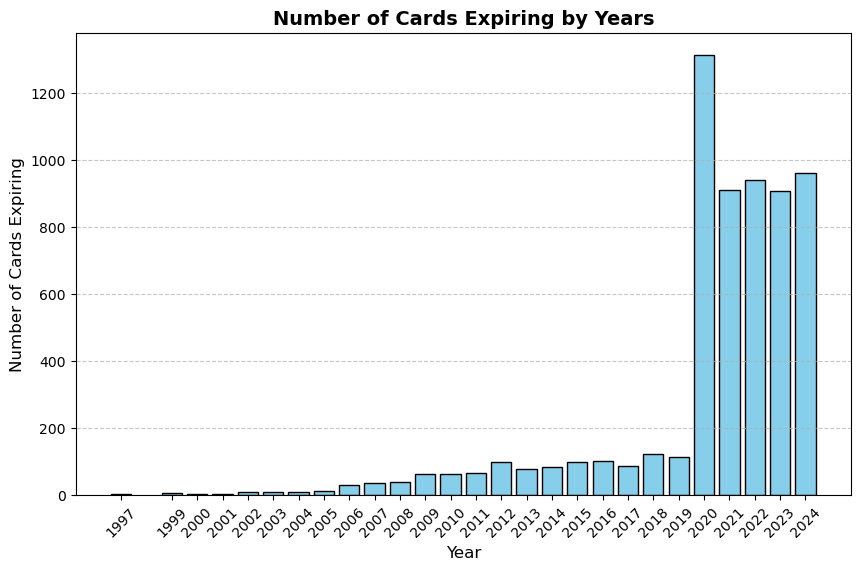

In [66]:
# Extract year from 'expires' column
df_cards = df_cards.with_columns(ps.col("expires").str.extract(r"(\d{4}$)").cast(ps.Int64).alias("expiry_year"))

# Extract the number of cards expiring each year
expiry_counts = df_cards.group_by("expiry_year").agg(ps.len().alias("num_cards")).sort("expiry_year")

# Extract date for plotting
years = expiry_counts["expiry_year"].to_list()
num_cards = expiry_counts["num_cards"].to_list()

# Plot  the stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(years, num_cards, color="skyblue", edgecolor="black")


# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cards Expiring", fontsize=12)
plt.title("Number of Cards Expiring by Years", fontsize=14, fontweight="bold")

# Show grid and plot
plt.xticks(years, rotation=45) # Ensure all years are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 14. Count of Cards with and without Chip
* Bar Chart of how many cards have a chip vs. no chip

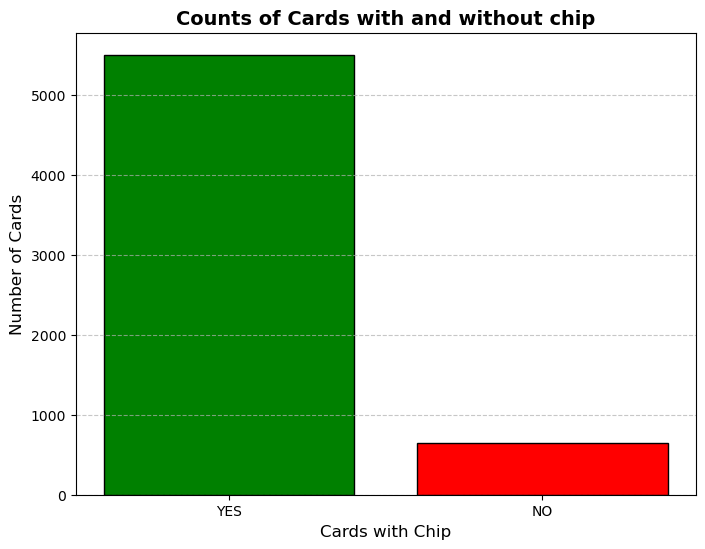

In [67]:
# count the number of cards with and without chip
chip_counts = df_cards.group_by("has_chip").agg(ps.len().alias("num_cards"))

# Extract data for Plotting
chip_labels = chip_counts["has_chip"].to_list()
num_cards = chip_counts["num_cards"].to_list()

# Plot the bar chart
plt.figure(figsize=(8,6))
plt.bar(chip_labels, num_cards, color=['green' if label=='YES' else 'red'for label in chip_labels], edgecolor="black")

# Add lables and title 
plt.xlabel("Cards with Chip", fontsize=12)
plt.ylabel("Number of Cards", fontsize=12)
plt.title("Counts of Cards with and without chip", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Numerical Analysis
### 1. Descriptive Statistics

In [68]:
df_cards.describe()

statistic,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,expiry_year
str,f64,f64,str,str,f64,str,f64,str,f64,f64,str,f64,f64
"""count""",6146.0,6146.0,"""6146""","""6146""",6146.0,"""6146""",6146.0,"""6146""",6146.0,6146.0,"""6146""",6146.0,6146.0
"""null_count""",0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0
"""mean""",3072.5,994.939636,null,null,4.8204e15,null,506.220794,null,1.503091,14347.49398,"""2011-01-15 12:55:31.727953""",2013.436707,2020.330784
"""std""",1774.341709,578.614626,null,null,1.3286e15,null,289.431123,null,0.519191,12014.463884,null,4.270699,3.958049
"""min""",0.0,0.0,"""Amex""","""Credit""",3.0011e14,"""01/2002""",0.0,"""NO""",1.0,0.0,"""1991-01-01""",2002.0,1997.0
"""25%""",1536.0,492.0,null,null,4.4856e15,null,257.0,null,1.0,7030.0,"""2006-10-01""",2010.0,2020.0
"""50%""",3073.0,992.0,null,null,5.1093e15,null,517.0,null,1.0,12594.0,"""2010-03-01""",2013.0,2021.0
"""75%""",4609.0,1495.0,null,null,5.5852e15,null,756.0,null,2.0,19158.0,"""2016-05-01""",2017.0,2023.0
"""max""",6145.0,1999.0,"""Visa""","""Debit (Prepaid)""",6.9972e15,"""12/2024""",999.0,"""YES""",3.0,151223.0,"""2020-02-01""",2020.0,2024.0


### 2. Correlation Analysis
* Check correlation between **credit_limit,num_cards_issued, and acct_open_date.**

In [70]:
df_selected = df_cards.select([
    ps.col("credit_limit"),
    ps.col("num_cards_issued"),
    ps.col("acct_open_date").dt.year().alias("acct_open_date_numeric")
])

df_selected.corr()

credit_limit,num_cards_issued,acct_open_date_numeric
f64,f64,f64
1.0,-0.084688,0.018764
-0.084688,1.0,-0.042316
0.018764,-0.042316,1.0


### 3. Credit Limit Analysis per Card Brand
* Find the **average credit limit per Card Brand**

In [72]:
# Group by 'card_brand' and calculate the mean of 'credit_limit'
avg_credit_limit_per_brand = df_cards.group_by("card_brand").agg(
    ps.col("credit_limit").mean().alias("avg_credit_limit")
)

# Collect the result into a list of dictionaries
avg_credit_limit_list = avg_credit_limit_per_brand.to_dicts()

# Print the result
for row in avg_credit_limit_list:
    print(row)

{'card_brand': 'Amex', 'avg_credit_limit': 11436.3184079602}
{'card_brand': 'Mastercard', 'avg_credit_limit': 14659.600186974136}
{'card_brand': 'Discover', 'avg_credit_limit': 10816.267942583732}
{'card_brand': 'Visa', 'avg_credit_limit': 14737.334909716252}


### 4. Credit Limit Analysis per Card Type
* Find the **Average credit limit per card Type**

In [73]:
# Group by 'card_brand' and calculate the mean of 'credit_limit'
avg_credit_limit_per_brand=df_cards.group_by("card_type").agg(
    ps.col("credit_limit").mean().alias("avg_credit_limit")
)

# Collect the results into a list of dictionaries
avg_credit_limit_list = avg_credit_limit_per_brand.to_dicts()

# Print the results
for row in avg_credit_limit_list:
    print(row)


{'card_type': 'Credit', 'avg_credit_limit': 11174.380165289256}
{'card_type': 'Debit (Prepaid)', 'avg_credit_limit': 64.44809688581314}
{'card_type': 'Debit', 'avg_credit_limit': 18557.88863571632}


### 5. Percentage of Cards with Chip vs. No Chip
* find Out how many users still use **non-chip cards.**

In [75]:
non_chip_cards = df_cards.filter(ps.col("has_chip") == "NO")
num_non_chip_cards = non_chip_cards.height
total_cards = df_cards.height
percentage_non_chip = (num_non_chip_cards / total_cards) * 100
percentage_non_chip 

10.510901399284087

### 6. Client-level Analysis
* Find the **average number of cards per client**

In [76]:
cards_per_client = df_cards.group_by("client_id").agg(ps.len().alias("num_cards"))
# Calculate the average number of cards per client
average_cards_per_client = cards_per_client["num_cards"].mean()
average_cards_per_client

3.073

### 7. Oldest and Newest Accounts
* Find the **Oldest and most recent** account opening dates.


In [77]:
oldest_account_date = df_cards["acct_open_date"].min()
newest_account_date = df_cards["acct_open_date"].max()
oldest_account_date, newest_account_date

(datetime.date(1991, 1, 1), datetime.date(2020, 2, 1))